<a href="https://colab.research.google.com/github/chonginbilly/Moringa_DS/blob/Moringa_python/Copy_of_Data_Cleaning_Group_Asssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
sns.set()

from datetime import datetime

%matplotlib inline

In [ ]:
# Load 'WorldCupMatches.csv' as a DataFrame
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_excel('rollingsales_bronx.xlsx')
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,215000.0,45034.0
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,570000.0,45161.0
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,1782.0,1548.0,1899.0,1.0,A1,0.0,45030.0
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,...,1.0,2.0,3.0,1911.0,4080.0,1931.0,1.0,S0,0.0,45223.0
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,1658.0,1428.0,1901.0,1.0,B9,350000.0,45103.0


In [ ]:
data=data[data.duplicated()]
data.head()

In [ ]:
sum(data.duplicated())

0

In [ ]:
data.isnull().any()
data.isnull().sum()


In [ ]:

data_cleaned=data.dropna(axis=0,how='all')
data_cleaned.shape

(0, 20)

In [ ]:
data_cleaned=data.dropna(axis=1,how='all')
data_cleaned.shape

In [ ]:
data.dropna(thresh=10)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         0 non-null      int64         
 1   NEIGHBORHOOD                    0 non-null      object        
 2   BUILDING_CLASS_CATEGORY         0 non-null      object        
 3   TAX_CLASS                       0 non-null      object        
 4   BLOCK                           0 non-null      int64         
 5   LOT                             0 non-null      int64         
 6   BUILDING CLASS AT PRESENT       0 non-null      object        
 7   ADDRESS                         0 non-null      object        
 8   APARTMENT NUMBER                0 non-null      object        
 9   ZIP CODE                        0 non-null      int64         
 10  RESIDENTIAL UNITS               0 non-null      float64       
 11  COMMERCIAL UNITS  

In [ ]:
outliersc_data=pd.read_excel('rollingsales_bronx.xlsx')
#outliersc_data.head()
outliersc_data.shape

(5611, 21)

In [ ]:
Q1=outliersc_data.quantile(0.25)
Q3=outliersc_data.quantile(0.75)
IQR=Q3-Q1
IQR

<ipython-input-70-5f96791eb075>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=outliersc_data.quantile(0.25)
<ipython-input-70-5f96791eb075>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=outliersc_data.quantile(0.75)


BOROUGH                           0.00
BLOCK                          2032.00
LOT                             121.00
EASEMENT                           NaN
ZIP CODE                          8.00
RESIDENTIAL UNITS                 1.00
COMMERCIAL UNITS                  0.00
TOTAL UNITS                       1.00
LAND SQUARE FEET               1523.00
GROSS SQUARE FEET              1545.25
YEAR BUILT                       36.00
TAX CLASS AT TIME OF SALE         1.00
SALE PRICE                   710000.00
SALE DATE                       173.00
dtype: float64

In [ ]:
outliersc_data_IQR=outliersc_data[~((outliersc_data <(Q1-1.5 *IQR))) | (outliersc_data >(Q1-1.5 *IQR))]
outliersc_data_IQR.shape

<ipython-input-69-24fa8ded0f39>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliersc_data_IQR=outliersc_data[~((outliersc_data <(Q1-1.5 *IQR))) | (outliersc_data >(Q1-1.5 *IQR))]


(5611, 21)

In [ ]:
clean_data_IQR=outliersc_data[~((outliersc_data <(Q1-1.5 *IQR))) | (outliersc_data >(Q1-1.5 *IQR))]
clean_data_IQR.shape

<ipython-input-68-05638758d57e>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  clean_data_IQR=outliersc_data[~((outliersc_data <(Q1-1.5 *IQR))) | (outliersc_data >(Q1-1.5 *IQR))]


(5611, 21)

# New Section

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
data['BOROUGH'].value_counts()

2    5611
Name: BOROUGH, dtype: int64

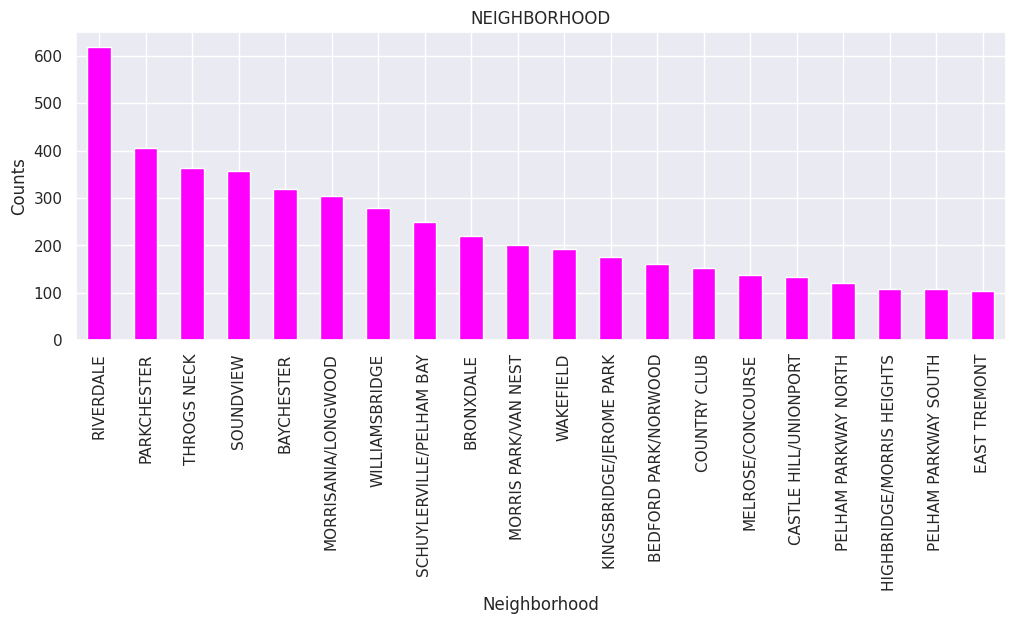

In [ ]:
# NEIGHBORHOOD
plt.figure(figsize = (12,4))
data['NEIGHBORHOOD'].value_counts()[:20].plot(kind = 'bar', color = 'magenta')
plt.title('NEIGHBORHOOD')
plt.xlabel('Neighborhood')
plt.ylabel('Counts')
plt.show()

In [ ]:
data.rename(columns = {'BUILDING CLASS CATEGORY': 'BUILDING_CLASS_CATEGORY',
                       'TAX CLASS AT PRESENT': 'TAX_CLASS'}, inplace = True)

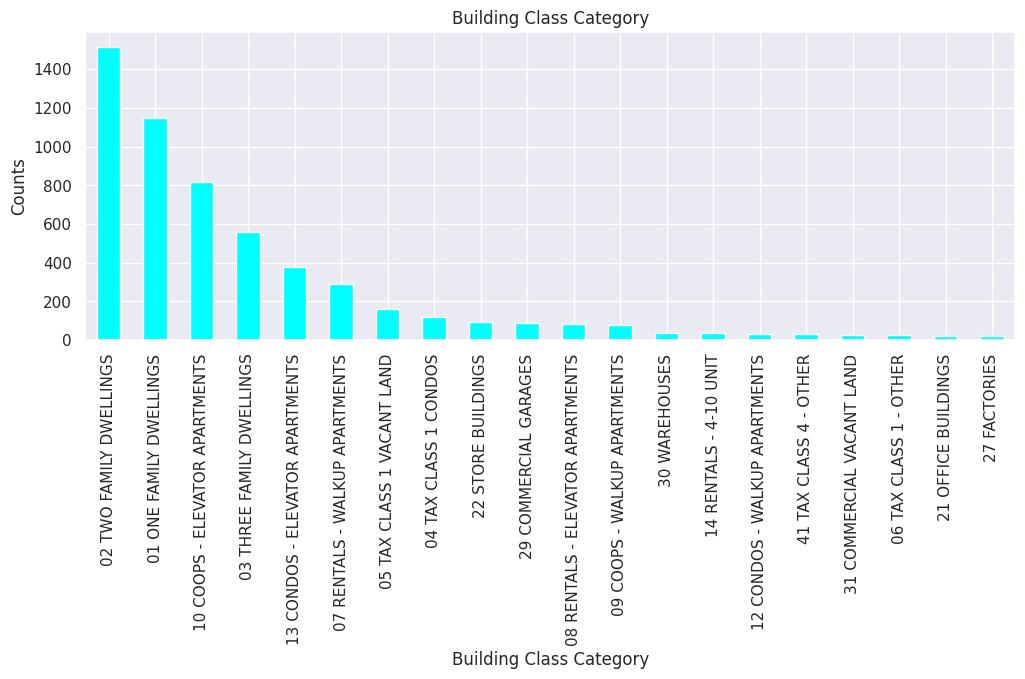

In [ ]:
# BUILDING_CLASS_CATEGORY
plt.figure(figsize = (12,4))
data['BUILDING_CLASS_CATEGORY'].value_counts()[:20].plot(kind = 'bar', color = 'cyan')
plt.title('Building Class Category')
plt.xlabel('Building Class Category')
plt.ylabel('Counts')
plt.show()

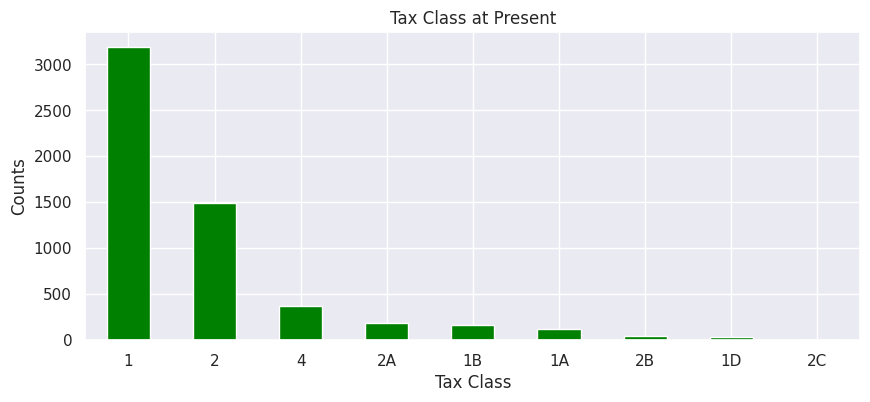

In [ ]:
# Tax Class at Present
plt.figure(figsize = (10,4))
data['TAX_CLASS'].value_counts().plot(kind = 'bar', color = 'green', rot = 0)
plt.title('Tax Class at Present')
plt.xlabel('Tax Class')
plt.ylabel('Counts')
plt.show()

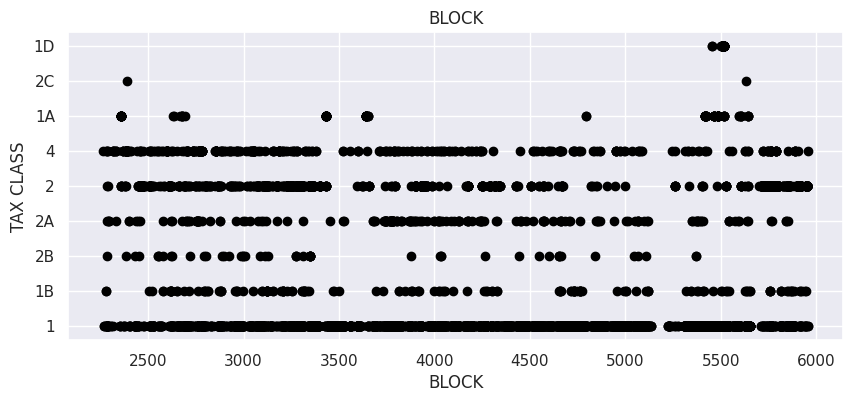

In [ ]:
# BLOCK
plt.figure(figsize = (10,4))
plt.scatter(x = data['BLOCK'], y = data['TAX_CLASS'], color = 'black')
plt.title('BLOCK')
plt.xlabel('BLOCK')
plt.ylabel('TAX CLASS')
plt.show()

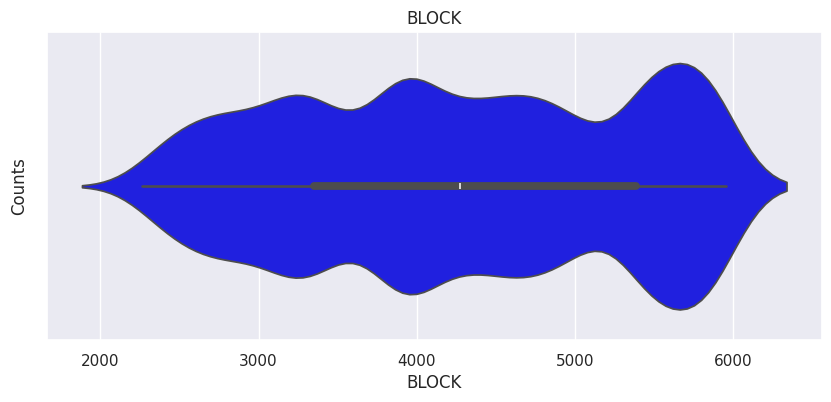

In [ ]:
plt.figure(figsize = (10,4))
sns.violinplot(x='BLOCK', data=data, color = 'blue')
plt.title('BLOCK')
plt.xlabel('BLOCK')
plt.ylabel('Counts')
plt.show()

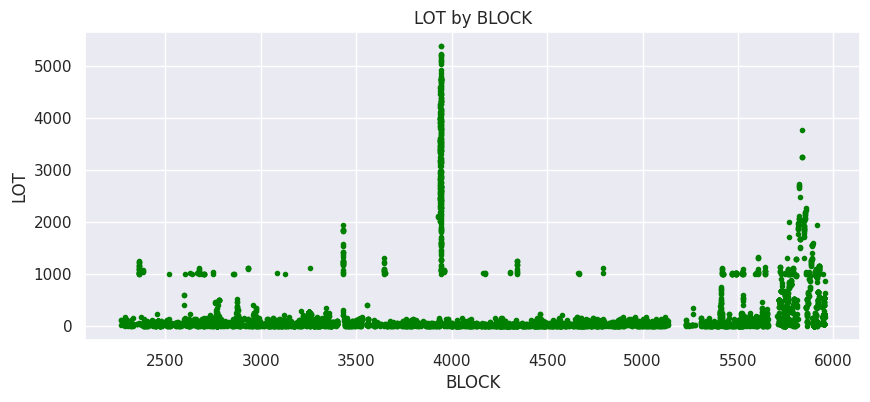

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(x = data['BLOCK'], y = data['LOT'], color = 'green', marker= '.')
plt.title('LOT by BLOCK')
plt.xlabel('BLOCK')
plt.ylabel('LOT')
plt.show()

In [ ]:
data.drop('EASEMENT', axis = 1, inplace = True)

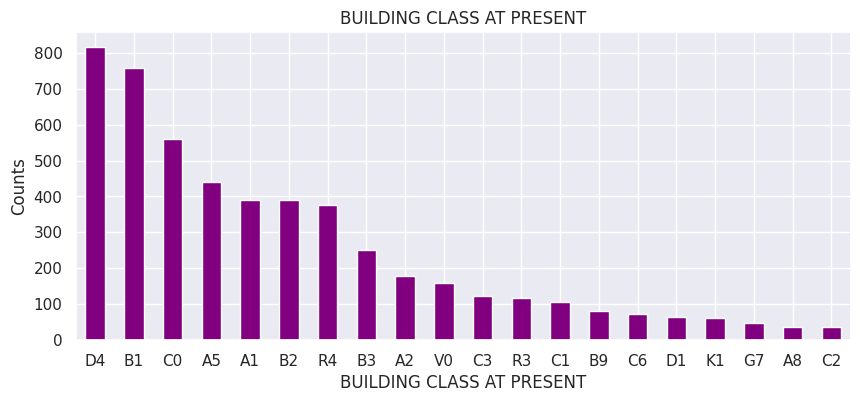

In [ ]:
plt.figure(figsize = (10,4))
data['BUILDING CLASS AT PRESENT'].value_counts()[:20].plot(kind = 'bar', color = 'purple', rot = 0)
plt.title('BUILDING CLASS AT PRESENT')
plt.xlabel('BUILDING CLASS AT PRESENT')
plt.ylabel('Counts')
plt.show()

In [ ]:
data['RESIDENTIAL UNITS'].isnull().sum()

965

In [ ]:
residential_mean = data['RESIDENTIAL UNITS'].mean().round(0)
residential_mean

4.0

In [ ]:
residential_mean = data['RESIDENTIAL UNITS'].mean().round(0)
data['RESIDENTIAL UNITS'] = data['RESIDENTIAL UNITS'].fillna(residential_mean)
data['RESIDENTIAL UNITS'].value_counts()[:20]

1.0     1634
2.0     1526
4.0     1104
3.0      567
0.0      509
6.0       21
5.0       21
8.0       16
10.0      15
7.0       12
21.0       9
13.0       8
15.0       7
28.0       7
60.0       7
81.0       5
54.0       5
16.0       5
30.0       5
14.0       5
11.0       4
49.0       4
20.0       4
Name: RESIDENTIAL UNITS, dtype: int64

In [ ]:
commercial_median = data['COMMERCIAL UNITS'].median().round(0)
data['COMMERCIAL UNITS'] = data['COMMERCIAL UNITS'].fillna(commercial_median)
data['COMMERCIAL UNITS'].value_counts()

0.0      5202
1.0       252
2.0        61
3.0        34
252.0      19
4.0        14
5.0         9
6.0         8
10.0        6
9.0         3
12.0        1
7.0         1
23.0        1
Name: COMMERCIAL UNITS, dtype: int64

In [ ]:
data['TOTAL UNITS'] = data['COMMERCIAL UNITS'] + data['RESIDENTIAL UNITS']
data['TOTAL UNITS'].isnull().sum()

0

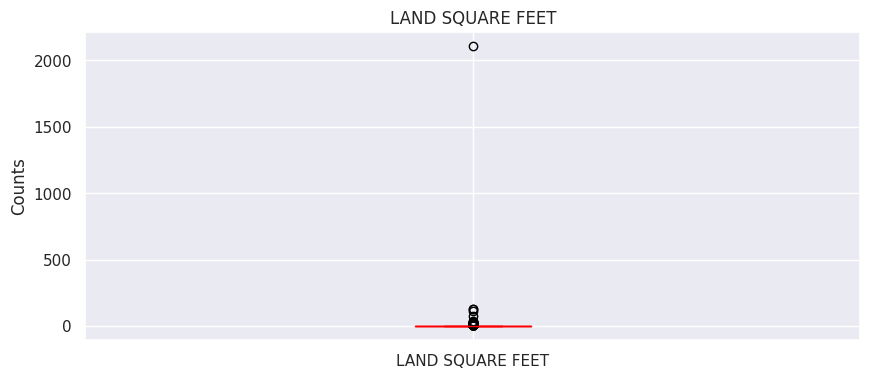

In [ ]:
plt.figure(figsize = (10,4))
land_median = data['LAND SQUARE FEET'].median()
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].fillna(land_median)
data['LAND SQUARE FEET'].value_counts().plot(kind = 'box', color = 'red')
plt.title('LAND SQUARE FEET')
plt.ylabel('Counts')
plt.show()

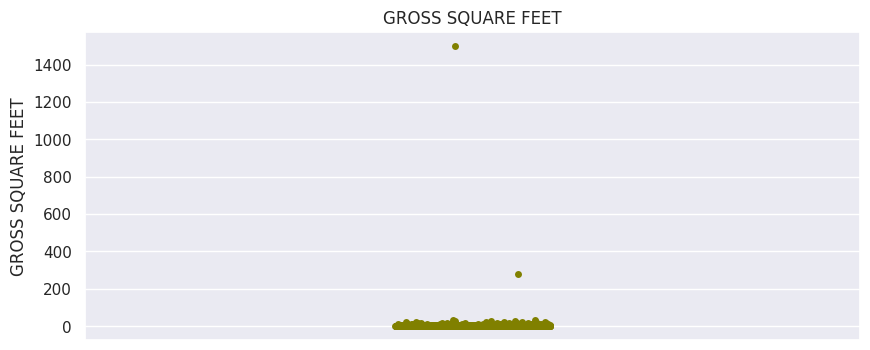

In [ ]:
plt.figure(figsize = (10,4))
gorss_median = data['GROSS SQUARE FEET'].median()
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(gorss_median)
gross_counts = data['GROSS SQUARE FEET'].value_counts()
sns.stripplot(gross_counts, color = 'olive')
plt.title('GROSS SQUARE FEET')
plt.show()

In [ ]:
data['YEAR BUILT'] = pd.to_datetime(data['YEAR BUILT'], format = '%Y',errors='coerce')
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'],format='%m/%d/%y',errors='coerce').fillna(pd.Timestamp.min)
#data['YEAR BUILT']=data['YEAR BUILT'].[dt.month,dt.day,dt.year]
#data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], format = '%y')

data.iloc[:,:]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,A1,4453 PARK AVENUE,NaN,10457,1.0,0.0,1.0,1646.0,1497.0,1899-01-01,1.0,A1,215000.0,1677-09-21 00:12:43.145224193
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,A1,4453 PARK AVENUE,NaN,10457,1.0,0.0,1.0,1646.0,1497.0,1899-01-01,1.0,A1,570000.0,1677-09-21 00:12:43.145224193
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,A1,461 EAST 178 STREET,NaN,10457,1.0,0.0,1.0,1782.0,1548.0,1899-01-01,1.0,A1,0.0,1677-09-21 00:12:43.145224193
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,S0,2364 WASHINGTON AVENUE,NaN,10458,1.0,2.0,3.0,1911.0,4080.0,1931-01-01,1.0,S0,0.0,1677-09-21 00:12:43.145224193
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,B9,454 EAST 172 STREET,NaN,10457,2.0,0.0,2.0,1658.0,1428.0,1901-01-01,1.0,B9,350000.0,1677-09-21 00:12:43.145224193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,D4,"4295 WEBSTER AVENUE, 4K",NaN,10470,4.0,0.0,4.0,2500.0,2196.0,1957-01-01,2.0,D4,114500.0,1677-09-21 00:12:43.145224193
5607,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,D4,"4295 WEBSTER AVENUE, 5C",NaN,10470,4.0,0.0,4.0,2500.0,2196.0,1957-01-01,2.0,D4,135000.0,1677-09-21 00:12:43.145224193
5608,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,D4,"4295 WEBSTER AVENUE, 5F",NaN,10470,4.0,0.0,4.0,2500.0,2196.0,1957-01-01,2.0,D4,265000.0,1677-09-21 00:12:43.145224193
5609,2,WOODLAWN,22 STORE BUILDINGS,4,3380,46,K1,4361 KATONAH AVENUE,NaN,10470,0.0,1.0,1.0,9699.0,3400.0,1970-01-01,4.0,K1,0.0,1677-09-21 00:12:43.145224193


In [ ]:
data['SALE DATE'] = data['SALE DATE'].apply(np.datetime64)
data

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,A1,4453 PARK AVENUE,NaN,10457,1.0,0.0,1.0,1646.0,1497.0,1899-01-01,1.0,A1,215000.0,1677-09-21T00:12:43.145224
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,A1,4453 PARK AVENUE,NaN,10457,1.0,0.0,1.0,1646.0,1497.0,1899-01-01,1.0,A1,570000.0,1677-09-21T00:12:43.145224
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,A1,461 EAST 178 STREET,NaN,10457,1.0,0.0,1.0,1782.0,1548.0,1899-01-01,1.0,A1,0.0,1677-09-21T00:12:43.145224
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,S0,2364 WASHINGTON AVENUE,NaN,10458,1.0,2.0,3.0,1911.0,4080.0,1931-01-01,1.0,S0,0.0,1677-09-21T00:12:43.145224
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,B9,454 EAST 172 STREET,NaN,10457,2.0,0.0,2.0,1658.0,1428.0,1901-01-01,1.0,B9,350000.0,1677-09-21T00:12:43.145224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,D4,"4295 WEBSTER AVENUE, 4K",NaN,10470,4.0,0.0,4.0,2500.0,2196.0,1957-01-01,2.0,D4,114500.0,1677-09-21T00:12:43.145224
5607,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,D4,"4295 WEBSTER AVENUE, 5C",NaN,10470,4.0,0.0,4.0,2500.0,2196.0,1957-01-01,2.0,D4,135000.0,1677-09-21T00:12:43.145224
5608,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,D4,"4295 WEBSTER AVENUE, 5F",NaN,10470,4.0,0.0,4.0,2500.0,2196.0,1957-01-01,2.0,D4,265000.0,1677-09-21T00:12:43.145224
5609,2,WOODLAWN,22 STORE BUILDINGS,4,3380,46,K1,4361 KATONAH AVENUE,NaN,10470,0.0,1.0,1.0,9699.0,3400.0,1970-01-01,4.0,K1,0.0,1677-09-21T00:12:43.145224


In [ ]:
data.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING_CLASS_CATEGORY                   object
TAX_CLASS                                 object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                        datetime64[ns]
TAX CLASS AT TIME OF SALE                float64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                                 object
dtype: object

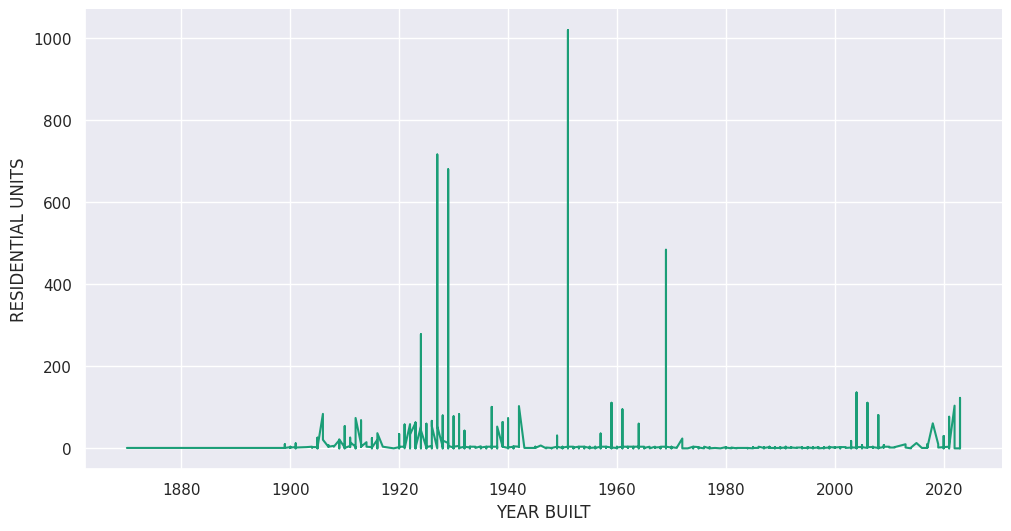

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['YEAR BUILT']
  ys = series['RESIDENTIAL UNITS']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('YEAR BUILT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('YEAR BUILT')
_ = plt.ylabel('RESIDENTIAL UNITS')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         5611 non-null   int64         
 1   NEIGHBORHOOD                    5611 non-null   object        
 2   BUILDING_CLASS_CATEGORY         5611 non-null   object        
 3   TAX_CLASS                       5611 non-null   object        
 4   BLOCK                           5611 non-null   int64         
 5   LOT                             5611 non-null   int64         
 6   BUILDING CLASS AT PRESENT       5611 non-null   object        
 7   ADDRESS                         5611 non-null   object        
 8   APARTMENT NUMBER                548 non-null    object        
 9   ZIP CODE                        5611 non-null   int64         
 10  RESIDENTIAL UNITS               5611 non-null   float64       
 11  COMM